### Analisa Prediksi Pasien Diabetes Dengan Algoritma K-NN, Regresi Logistik, Naive Bayes dan SVM

In [ ]:
# Import Library
import pandas as pd
import numpy as np

Tentang Dataset :
- Pregnancies: Berapa kali hamil
- Glucose: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral
- Tekanan Darah: Tekanan darah diastolik (mm Hg)
- BloodPressure: Ketebalan lipatan kulit trisep (mm)
- Insulin: insulin serum 2 Jam (mu U/ml)
- BMI: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
- DiabetesPedigreeFunction: Fungsi silsilah diabetes
- Age: Usia (tahun)
- Outcome: Variabel kelas (0 atau 1)

Sumber Data : https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
# Import Dataset
data = pd.read_csv('diabetes.csv')
# Open Data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Preprocessing Data

In [ ]:
# Informasi Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Cek data yang kosong (NaN)
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Cek Data Duplikat
data.duplicated().sum()

0

In [ ]:
# Melihat Data Dalam Bentuk Statistik Descriptive
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Uji korelasi, untuk melihat positive atau negatif korelasi variabel X terhadap variabel Y
korelasi = data.corr()
korelasi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# Melihat data korelasi dalam bentuk Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor= data.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True,cmap = plt.cm.Reds)

NameError: ignored

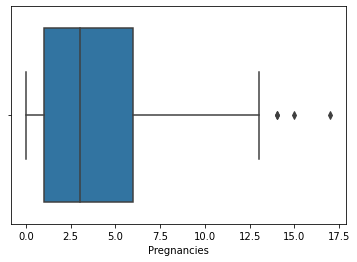

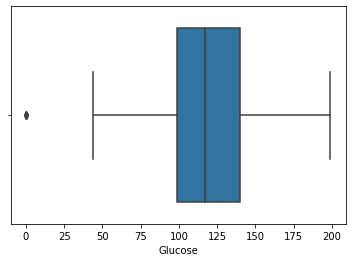

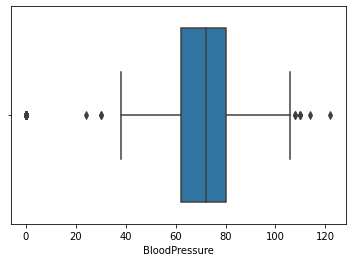

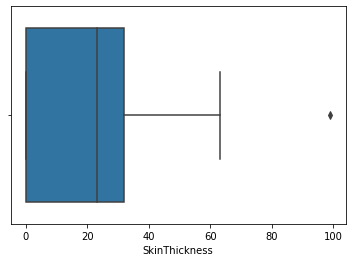

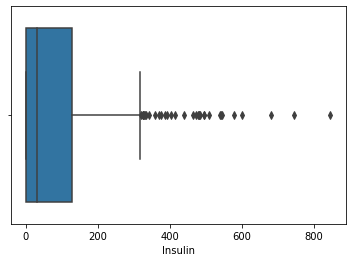

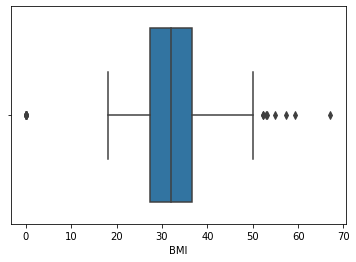

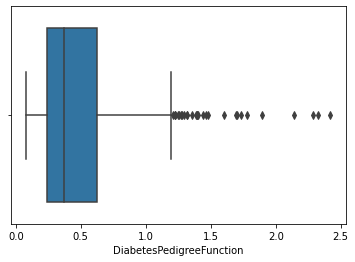

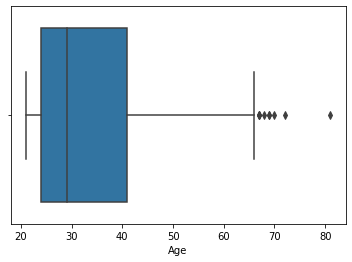

In [ ]:
# Mencari Data Outlier
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['Pregnancies'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['Glucose'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['BloodPressure'])
plt.show()# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['SkinThickness'])
plt.show()# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['Insulin'])
plt.show()# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['BMI'])
plt.show()
plt.show()# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.show()
plt.show()# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['Age'])
plt.show()

In [ ]:
#variabel Pregnancies
#mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q11,q31=np.percentile(data['Pregnancies'],[25,75])
s1 = q31-q11
ba1 = q31+(1.5*s1)
bw1 = q11-(1.5*s1)
# membuat persamaan
dt1=data[(data['Pregnancies']<bw1) | (data['Pregnancies']>ba1)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q11)
print("Quartile 3 :", q31)
print("Selisih :", s1)
print("Batas Atas :", ba1)
print("Batas Bawah :", bw1)
# Hasil Data Outlier
dt1

Quartile 1 : 1.0
Quartile 3 : 6.0
Selisih : 5.0
Batas Atas : 13.5
Batas Bawah : -6.5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [ ]:
# variabel Glucose
# mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q12,q32=np.percentile(data['Glucose'],[25,75])
s2 = q32-q12
ba2 = q32+(1.5*s2)
bw2 = q12-(1.5*s2)
# membuat persamaan
dt2=data[(data['Glucose']<bw2) | (data['Glucose']>ba2)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q12)
print("Quartile 3 :", q32)
print("Selisih :", s2)
print("Batas Atas :", ba2)
print("Batas Bawah :", bw2)
# Hasil Data Outlier
dt2

Quartile 1 : 99.0
Quartile 3 : 140.25
Selisih : 41.25
Batas Atas : 202.125
Batas Bawah : 37.125


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
#variabel BloodPressure
#mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q13,q33=np.percentile(data['BloodPressure'],[25,75])
s3 = q33-q13
ba3 = q33+(1.5*s3)
bw3 = q13-(1.5*s3)
# membuat persamaan
dt3=data[(data['BloodPressure']<bw3) | (data['BloodPressure']>ba3)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q13)
print("Quartile 3 :", q33)
print("Selisih :", s3)
print("Batas Atas :", ba3)
print("Batas Bawah :", bw3)
# Hasil Data Outlier
dt3

Quartile 1 : 62.0
Quartile 3 : 80.0
Selisih : 18.0
Batas Atas : 107.0
Batas Bawah : 35.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


In [ ]:
#variabel SkinThickness
#mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q14,q34=np.percentile(data['SkinThickness'],[25,75])
s4 = q34-q14
ba4 = q34+(1.5*s4)
bw4 = q14-(1.5*s4)
# membuat persamaan
dt4=data[(data['SkinThickness']<bw4) | (data['SkinThickness']>ba4)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q14)
print("Quartile 3 :", q34)
print("Selisih :", s4)
print("Batas Atas :", ba4)
print("Batas Bawah :", bw4)
# Hasil Data Outlier
dt4

Quartile 1 : 0.0
Quartile 3 : 32.0
Selisih : 32.0
Batas Atas : 80.0
Batas Bawah : -48.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [ ]:
#variabel Insulin
#mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q15,q35=np.percentile(data['Insulin'],[25,75])
s5 = q35-q15
ba5 = q35+(1.5*s5)
bw5 = q14-(1.5*s5)
# membuat persamaan
dt5=data[(data['Insulin']<bw5) | (data['Insulin']>ba5)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q15)
print("Quartile 3 :", q35)
print("Selisih :", s5)
print("Batas Atas :", ba5)
print("Batas Bawah :", bw5)
# Hasil Data Outlier
dt5

Quartile 1 : 0.0
Quartile 3 : 127.25
Selisih : 127.25
Batas Atas : 318.125
Batas Bawah : -190.875


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [ ]:
#variabel BMI
#mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q16,q36=np.percentile(data['BMI'],[25,75])
s6 = q36-q16
ba6 = q36+(1.5*s6)
bw6 = q16-(1.5*s6)
# membuat persamaan
dt6=data[(data['BMI']<bw6) | (data['BMI']>ba6)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q16)
print("Quartile 3 :", q36)
print("Selisih :", s6)
print("Batas Atas :", ba6)
print("Batas Bawah :", bw6)
# Hasil Data Outlier
dt6

Quartile 1 : 27.3
Quartile 3 : 36.6
Selisih : 9.3
Batas Atas : 50.550000000000004
Batas Bawah : 13.35


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


In [ ]:
#variabel DiabetesPedigreeFunction
#mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q17,q37=np.percentile(data['DiabetesPedigreeFunction'],[25,75])
s7 = q37-q17
ba7 = q37+(1.5*s7)
bw7 = q17-(1.5*s7)
# membuat persamaan
dt7=data[(data['DiabetesPedigreeFunction']<bw7) | (data['DiabetesPedigreeFunction']>ba7)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q17)
print("Quartile 3 :", q37)
print("Selisih :", s7)
print("Batas Atas :", ba7)
print("Batas Bawah :", bw7)
# Hasil Data Outlier
dt7

Quartile 1 : 0.24375
Quartile 3 : 0.62625
Selisih : 0.38249999999999995
Batas Atas : 1.2
Batas Bawah : -0.32999999999999996


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [ ]:
#variabel Age
#mencari q1, q3, batas bawah, batas atas, selisih q3 dengan q1

q18,q38=np.percentile(data['Age'],[25,75])
s8 = q38-q18
ba8 = q38+(1.5*s8)
bw8 = q18-(1.5*s8)
# membuat persamaan
dt8=data[(data['Age']<bw8) | (data['Age']>ba8)]
# Print Nilai Quartile, Selisih dan Batas
print("Quartile 1 :", q18)
print("Quartile 3 :", q38)
print("Selisih :", s8)
print("Batas Atas :", ba8)
print("Batas Bawah :", bw8)
# Hasil Data Outlier
dt8

Quartile 1 : 24.0
Quartile 3 : 41.0
Selisih : 17.0
Batas Atas : 66.5
Batas Bawah : -1.5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [ ]:
# Menghapus data yang outlier
data_bersih = data.drop([88,159,298,455,75,182,342,349,502,7,15,18,43,49,60,78,81,84,106,125,172,177,193,222,261,266,269,300,332,336,347,357,362,426,430,435,453,468,484,
                        494,522,533,535,549,589,597,601,604,619,643,691,697,703,706,579,8,13,54,111,139,153,186,220,228,231,247,248,258,286,296,360,370,375,392,409,415,480,486,519,574,584,612,
                        645,655,695,707,710,715,753,9,49,60,81,120,125,145,177,193,247,303,371,426,445,494,522,673,684,706,4,12,39,45,58,100,147,187,218,228,243,245,259,292,308,330,370,371,
                        383,395,445,534,593,606,618,621,622,659,661,123,363,453,459,489,537,666,674,684])
data_bersih

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Melakukan Splitting Feature Data (X) dan Target (Y)

In [ ]:
# separating the data and labels
X = data_bersih.drop(columns = 'Outcome', axis=1)
y = data_bersih['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

#### Standarisasi Data Feature (X)

In [ ]:
# Standarisasi Data Dengan Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.67382449  0.99135111 -0.01062636 ...  0.24797421  0.7888924
   1.56113222]
 [-0.86065109 -1.170674   -0.53973612 ... -0.84085334 -0.31175881
  -0.15491181]
 [ 1.28761472  2.19247617 -0.71610604 ... -1.35415776  0.96834641
  -0.0645937 ]
 ...
 [ 0.36692937  0.06476892 -0.01062636 ... -0.90307206 -0.73447269
  -0.24522991]
 [-0.86065109  0.23635821 -1.06884588 ... -0.29643957 -0.31973455
   1.2901779 ]
 [-0.86065109 -0.89613113 -0.18699628 ... -0.24977553 -0.45532202
  -0.87745666]]


In [ ]:
# Split Feature Ulang yang sudah di Standarisasi
X = standardized_data
y = data_bersih['Outcome']

#### Split Validation

In [ ]:
from sklearn.model_selection import train_test_split
# Split Validasi dengan Data Testing 0.2 dan Data Training 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Modeling Data Mining Dengan Algoritma K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# pengelompokan data dengan knn (k=5)
# penghitungan jarak dengan euclidean distance
classifier = KNeighborsClassifier(n_neighbors=5,weights='distance')
classifier.fit(X_train, y_train)
 
predictions_knn = classifier.predict(X_test)

In [ ]:
# Prediksi Algoritma K-NN
predictions_knn

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

#### Evaluasi Model Dengan Algoritma K-NN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Confusion Matrix is:\n")
print(confusion_matrix(y_test,predictions_knn))  
print("\n The Classification Report is:\n")
print(classification_report(y_test,predictions_knn))
print("\n The accuracy Score is:\n")  
print(accuracy_score(y_test, predictions_knn))

The Confusion Matrix is:

[[73 13]
 [21 21]]

 The Classification Report is:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        86
           1       0.62      0.50      0.55        42

    accuracy                           0.73       128
   macro avg       0.70      0.67      0.68       128
weighted avg       0.72      0.73      0.73       128


 The accuracy Score is:

0.734375


#### Modeling Data Dengan Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions_RL = classifier.predict(X_test)

In [ ]:
# Prediksi X_Test Berdasarkan Algoritma Regresi Logistik
predictions_RL

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

#### Evaluasi Model Algoritma Regresi Logistik

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Confusion Matrix is:\n")
print(confusion_matrix(y_test,predictions_RL))  
print("\n The Classification Report is:\n")
print(classification_report(y_test,predictions_RL))
print("\n The accuracy Score is:\n")  
print(accuracy_score(y_test, predictions_RL))

The Confusion Matrix is:

[[77  9]
 [19 23]]

 The Classification Report is:

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        86
           1       0.72      0.55      0.62        42

    accuracy                           0.78       128
   macro avg       0.76      0.72      0.73       128
weighted avg       0.77      0.78      0.77       128


 The accuracy Score is:

0.78125


#### Modeling Data Mining Dengan Algoritma Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB()
model_naive.fit(X_train, y_train) 

predicted_naive = model_naive.predict(X_test)

In [ ]:
# Prediksi X_Test Berdasarkan Algoritma Regresi Naive Bayes
predicted_naive

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

#### Evaluasi Model Algoritma Naive Bayes

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Confusion Matrix is:\n")
print(confusion_matrix(y_test,predicted_naive))  
print("\n The Classification Report is:\n")
print(classification_report(y_test,predicted_naive))
print("\n The accuracy Score is:\n")  
print(accuracy_score(y_test, predicted_naive))

The Confusion Matrix is:

[[75 11]
 [15 27]]

 The Classification Report is:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        86
           1       0.71      0.64      0.67        42

    accuracy                           0.80       128
   macro avg       0.77      0.76      0.76       128
weighted avg       0.79      0.80      0.79       128


 The accuracy Score is:

0.796875


#### Modeling Model Algoritma SVM

In [ ]:
from sklearn.svm import SVC

classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, y_train)

predicted_SVM = classifier4.predict(X_test)

In [ ]:
# # Prediksi X_Test Berdasarkan Algoritma SVM
predicted_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

#### Evaluasi Model Algoritma SVM

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Confusion Matrix is:\n")
print(confusion_matrix(y_test,predicted_SVM))  
print("\n The Classification Report is:\n")
print(classification_report(y_test,predicted_SVM))
print("\n The accuracy Score is:\n")  
print(accuracy_score(y_test, predicted_SVM))

The Confusion Matrix is:

[[81  5]
 [20 22]]

 The Classification Report is:

              precision    recall  f1-score   support

           0       0.80      0.94      0.87        86
           1       0.81      0.52      0.64        42

    accuracy                           0.80       128
   macro avg       0.81      0.73      0.75       128
weighted avg       0.81      0.80      0.79       128


 The accuracy Score is:

0.8046875
